In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("bank.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.shape

(4521, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [7]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

numeric_cols, categorical_cols

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'y'])

In [8]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
for col in categorical_cols:
    print(col)
    print(df[col].value_counts().head())
    print("-" * 30)

job
job
management     969
blue-collar    946
technician     768
admin.         478
services       417
Name: count, dtype: int64
------------------------------
marital
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
------------------------------
education
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
------------------------------
default
default
no     4445
yes      76
Name: count, dtype: int64
------------------------------
housing
housing
yes    2559
no     1962
Name: count, dtype: int64
------------------------------
loan
loan
no     3830
yes     691
Name: count, dtype: int64
------------------------------
contact
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64
------------------------------
month
month
may    1398
jul     706
aug     633
jun     531
nov     389
Name: count, dtype: int64
------------------------------
poutcome
poutcome
unknown 

In [10]:
for col in categorical_cols:
    print(col, "→", df[col].nunique())


job → 12
marital → 3
education → 4
default → 2
housing → 2
loan → 2
contact → 3
month → 12
poutcome → 4
y → 2


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

In [12]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
df[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
target_col = "y"

X = df.drop(columns=[target_col])
y = df[target_col]

In [17]:
y.value_counts()

,count
y,
no,4000
yes,521


In [18]:
y = y.map({"no": 0, "yes": 1})

In [19]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

numeric_cols, categorical_cols

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape


((3616, 51), (905, 51))

In [23]:
import joblib
joblib.dump(preprocessor, "preprocessor.joblib")


['preprocessor.joblib']

In [24]:
feature_names = preprocessor.get_feature_names_out()
feature_names[:20], len(feature_names)

(array(['num__age', 'num__balance', 'num__day', 'num__duration',
        'num__campaign', 'num__pdays', 'num__previous', 'cat__job_admin.',
        'cat__job_blue-collar', 'cat__job_entrepreneur',
        'cat__job_housemaid', 'cat__job_management', 'cat__job_retired',
        'cat__job_self-employed', 'cat__job_services', 'cat__job_student',
        'cat__job_technician', 'cat__job_unemployed', 'cat__job_unknown',
        'cat__marital_divorced'], dtype=object),
 51)

In [25]:
import pandas as pd

X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df  = pd.DataFrame(X_test_processed, columns=feature_names)

X_train_df.head()

,num__age,num__balance,num__day,num__duration,num__campaign,num__pdays,num__previous,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,...,cat__month_jun,cat__month_mar,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_failure,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown
0,-0.864347,-0.505865,-0.492444,-0.417317,0.065082,-0.411541,-0.329453,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.673204,-0.448232,-0.248716,-0.612989,-0.570967,0.447116,11.136987,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.282513,-0.499461,0.726196,-0.804824,-0.252942,-0.411541,-0.329453,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.673204,2.456534,0.360604,-0.820171,-0.570967,-0.411541,-0.329453,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.951514,1.297118,-0.004988,-0.724253,1.337181,-0.411541,-0.329453,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_train_df.shape, X_test_df.shape, y_train.shape, y_test.shape

((3616, 51), (905, 51), (3616,), (905,))

In [27]:
X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [28]:
pip install clustpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for clustpy: filename=clustpy-0.0.2-cp312-cp312-linux_x86_64.whl size=2504888 sha256=3b6e8bcd0466f8ab79142c0b36cb2145080c5c96cd12811471477b45a1b5adcb
  Stored in directory: /root/.cache/pip/wheels/a9/1a/7c/dae61064b79de744e63cde65e1b84396b62ce46f0a3460fd3f
Successfully built clustpy


In [29]:
import pandas as pd
import numpy as np

from clustpy.partition import XMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [30]:
X_train = X_train_df.values
X_test  = X_test_df.values

In [31]:
xmeans = XMeans(
    n_clusters_init=2,
    max_n_clusters=10,
    random_state=42
)

In [32]:
xmeans.fit(X_train)

XMeans(max_n_clusters=10, random_state=RandomState(MT19937) at 0x7EC11615AC40)

In [33]:
train_clusters = xmeans.labels_

print("Number of clusters found:", len(np.unique(train_clusters)))

Number of clusters found: 10


In [34]:
silhouette = silhouette_score(X_train, train_clusters)
db_index   = davies_bouldin_score(X_train, train_clusters)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.09602571224837732
Davies-Bouldin Index: 2.0330999878740212


In [35]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_train, train_clusters)
nmi = normalized_mutual_info_score(y_train, train_clusters)

print("ARI:", ari)
print("NMI:", nmi)

ARI: 0.03820540437872206
NMI: 0.04458771140515766


In [36]:
X_train_with_clusters = X_train_df.copy()
X_train_with_clusters["cluster"] = train_clusters
X_train_with_clusters.to_csv("X_train_with_clusters.csv", index=False)

In [37]:
# Average values of features across clusters
cluster_means = X_train_with_clusters.groupby("cluster").mean()
cluster_means

,num__age,num__balance,num__day,num__duration,num__campaign,num__pdays,num__previous,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,...,cat__month_jun,cat__month_mar,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_failure,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.414843,6.300265,0.123126,-0.132810,-0.187706,0.266629,0.227621,0.102564,0.128205,0.025641,...,0.179487,0.000000,0.179487,0.153846,0.051282,0.025641,0.179487,0.025641,0.102564,0.692308
1,-0.070089,-0.172925,0.142265,2.541514,-0.031289,-0.344374,-0.292878,0.079545,0.265152,0.056818,...,0.083333,0.000000,0.306818,0.109848,0.007576,0.003788,0.015152,0.018939,0.007576,0.958333
2,-0.283758,-0.263348,1.070337,-0.330255,0.680486,-0.408911,-0.325686,0.103620,0.197253,0.037453,...,0.058677,0.006242,0.293383,0.049938,0.008739,0.003745,0.001248,0.003745,0.000000,0.995006
3,0.168358,-0.031672,0.500522,-0.083327,-0.369257,1.160353,0.950184,0.157407,0.106481,0.032407,...,0.032407,0.023148,0.050926,0.305556,0.074074,0.046296,0.611111,0.175926,0.212963,0.000000
4,1.274034,-0.136391,-0.245518,-0.228009,-0.152342,-0.375170,-0.298663,0.087464,0.201166,0.039359,...,0.195335,0.021866,0.193878,0.088921,0.027697,0.014577,0.011662,0.005831,0.016035,0.966472
5,-0.224017,-0.150747,-0.443698,0.106394,-0.221140,2.294228,10.593840,0.100000,0.300000,0.000000,...,0.000000,0.000000,0.400000,0.100000,0.300000,0.100000,0.600000,0.200000,0.200000,0.000000
6,-0.610439,-0.253869,-0.647586,-0.191382,-0.249884,-0.397544,-0.313786,0.114423,0.252885,0.036538,...,0.164423,0.005769,0.387500,0.056731,0.003846,0.010577,0.006731,0.004808,0.005769,0.982692
7,-0.159323,-0.202233,-0.610558,-0.058422,-0.211354,2.834614,0.919321,0.150000,0.273077,0.034615,...,0.011538,0.003846,0.580769,0.011538,0.015385,0.011538,0.692308,0.265385,0.042308,0.000000
8,0.066998,2.141578,0.143686,-0.124748,-0.043046,-0.314493,-0.247981,0.050000,0.140000,0.025000,...,0.140000,0.015000,0.235000,0.275000,0.020000,0.000000,0.050000,0.020000,0.005000,0.925000


In [38]:
# Distribution of target y across clusters (in percent)
cluster_vs_target = pd.crosstab(
    X_train_with_clusters["cluster"],
    y_train,
    normalize="index"
)
cluster_vs_target

y,0,1
cluster,,
0,0.903226,0.096774
1,0.873239,0.126761
2,0.894009,0.105991
3,0.879781,0.120219
4,0.888889,0.111111
5,1.000000,0.000000
6,0.889294,0.110706
7,0.875598,0.124402
8,0.880795,0.119205


In [39]:
# The number of objects in each cluster
cluster_sizes = X_train_with_clusters["cluster"].value_counts().sort_index()
cluster_sizes

,count
cluster,
0,39
1,264
2,801
3,216
4,686
5,10
6,1040
7,260
8,200


In [40]:
# Add target y to the dataframe for easy analysis
X_train_with_clusters["target"] = y_train.values
X_train_with_clusters.head()

,num__age,num__balance,num__day,num__duration,num__campaign,num__pdays,num__previous,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,...,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_failure,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown,cluster,target
0,-0.864347,-0.505865,-0.492444,-0.417317,0.065082,-0.411541,-0.329453,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,0
1,-0.673204,-0.448232,-0.248716,-0.612989,-0.570967,0.447116,11.136987,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5,0
2,0.282513,-0.499461,0.726196,-0.804824,-0.252942,-0.411541,-0.329453,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
3,-0.673204,2.456534,0.360604,-0.820171,-0.570967,-0.411541,-0.329453,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8,0
4,0.951514,1.297118,-0.004988,-0.724253,1.337181,-0.411541,-0.329453,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0


In [41]:
# The average value of target (the share of "yes") by clusters
cluster_target_mean = X_train_with_clusters.groupby("cluster")["target"].mean()
cluster_target_mean

,target
cluster,
0,0.076923
1,0.454545
2,0.033708
3,0.277778
4,0.090379
5,0.200000
6,0.061538
7,0.134615
8,0.090000


In [42]:
# Save the analysis results
cluster_means.to_csv("cluster_means.csv")
cluster_vs_target.to_csv("cluster_vs_target.csv")
cluster_sizes.to_csv("cluster_sizes.csv")
cluster_target_mean.to_csv("cluster_target_mean.csv")

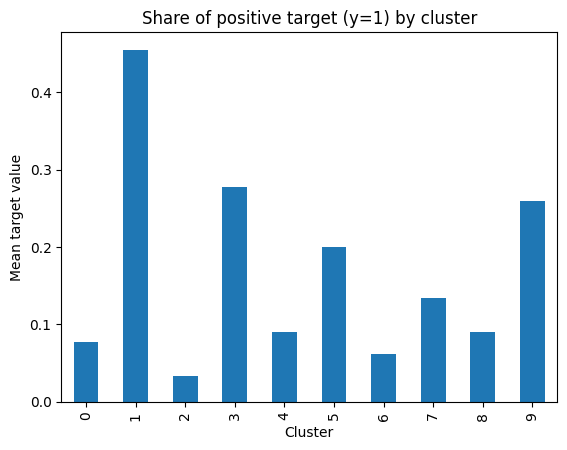

In [43]:
import matplotlib.pyplot as plt

cluster_target_mean.plot(kind="bar")
plt.title("Share of positive target (y=1) by cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean target value")
plt.show()